In [63]:
from queue import Queue
import numpy as np
from concurrent.futures import ThreadPoolExecutor
from threading import Thread
import time
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

# Exercice 1.9

Patients arrive in 10 minutes intervals on average, starting at 9AM.  
The office stops taking patients at 4PM.  
There are three doctors.  
Each doctor sees a patient in anywhere between 5 and 20 minutes.

In [81]:
patients = Queue()
out = Queue()

def patient():
    first = time.time()
    while time.time() - first < 7:
        arrived = time.time()
        patients.put({"arrived": arrived})
        print("New patient arrived at %s" %\
                  datetime.datetime.fromtimestamp(datetime.datetime(2017, 3, 7, 9, 0, 0).timestamp() +\
                                                  3600 * (arrived - first)).strftime("%H:%M:%S"),
              flush=True)
        time.sleep(np.random.exponential(10 / 60))

def doctor():
    while True:
        patient = patients.get()
        patient["waited"] = time.time() - patient["arrived"]
        handling = np.random.uniform(5 / 60, 20 / 60)
        time.sleep(handling)
        print("Saw 1 patient in %.1f minutes" % (handling * 60), flush=True)
        patient["out"] = time.time()
        out.put(patient)

In [82]:
Thread(target=patient).start()
doctors = [Thread(target=doctor).start()] * 3

while not patients.empty():
    pass

New patient arrived at 09:00:00
New patient arrived at 09:07:33
Saw 1 patient in 17.4 minutesNew patient arrived at 09:17:50

New patient arrived at 09:21:23
New patient arrived at 09:30:25
Saw 1 patient in 13.0 minutes
Saw 1 patient in 12.0 minutes
New patient arrived at 09:45:13
New patient arrived at 09:50:29
Saw 1 patient in 19.2 minutes
Saw 1 patient in 10.0 minutes
Saw 1 patient in 8.8 minutes
Saw 1 patient in 10.8 minutes
New patient arrived at 10:49:20
New patient arrived at 10:52:50
Saw 1 patient in 8.6 minutes
New patient arrived at 11:05:21
Saw 1 patient in 11.3 minutes
Saw 1 patient in 8.0 minutes
New patient arrived at 11:33:09
Saw 1 patient in 9.3 minutes
New patient arrived at 11:44:49
New patient arrived at 11:45:22
Saw 1 patient in 7.7 minutes
New patient arrived at 11:53:26
New patient arrived at 11:59:56
Saw 1 patient in 12.9 minutes
Saw 1 patient in 12.9 minutes
New patient arrived at 12:24:45
Saw 1 patient in 6.3 minutes
New patient arrived at 12:30:48
New patient 

In [83]:
all_patients = []
while not out.empty():
    all_patients.append(out.get())

In [85]:
print("%d patients went to the office" % len(all_patients))
print("%d patients had to wait, for %d minutes on average" %\
          (len([elem for elem in all_patients]), np.mean([60 * elem["waited"] for elem in all_patients])))
print("The office closed at %s" %\
          datetime.datetime.fromtimestamp(datetime.datetime(2017, 3, 7, 9, 0, 0).timestamp() +\
                                          3600 * (max(all_patients, key=lambda x: x["out"])["out"] -\
                                                  min(all_patients, key=lambda x: x["arrived"])["arrived"]))\
              .strftime("%H:%M:%S"))

35 patients went to the office
35 patients had to wait, for 31 minutes on average
The office closed at 16:49:08


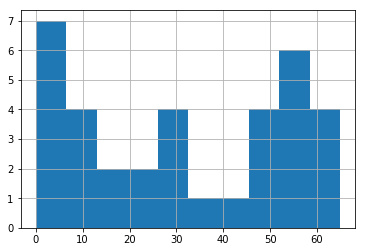

In [86]:
fig, ax = plt.subplots()
ax.hist([60 * elem["waited"] for elem in all_patients])
ax.grid();